#import libraries and datasets

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from pathlib import Path


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/hapdf.csv')


#subsetting and wranglings. I had to fill in the blanks with median values and also change the unix type for the datetime formula.

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# Sort the DataFrame based on the desired column in descending order
sorted_df = df.sort_values(by='Happiness Score', ascending=False)

# Select the top 5 entities with the highest Happiness Score
top_5 = sorted_df.head(5)

# Select the bottom 5 entities with the lowest Happiness Score
bottom_5 = sorted_df.tail(5)


In [ ]:
print(top_5)

         Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
625      Finland               1            7.769                   1.34000   
470      Finland               1            7.632                   1.30500   
626      Denmark               2            7.600                   1.38300   
471       Norway               2            7.594                   1.45600   
135  Switzerland               1            7.587                   1.39651   

      Family  Health (Life Expectancy)  Freedom  \
625  1.58700                   0.98600  0.59600   
470  1.59200                   0.87400  0.68100   
626  1.57300                   0.99600  0.59200   
471  1.58200                   0.86100  0.68600   
135  1.34951                   0.94143  0.66557   

     Trust (Government Corruption)  Generosity  Year  
625                        0.39300     0.15300  2019  
470                        0.39300     0.20200  2018  
626                        0.41000     0.25200  2019 

In [ ]:
print(bottom_5)

                      Country  Happiness Rank  Happiness Score  \
180                   Burundi             157            2.905   
468                   Burundi             154            2.905   
780               South Sudan             156            2.853   
141                      Togo             158            2.839   
469  Central African Republic             155            2.693   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
180                  0.068310  0.234420                  0.157470  0.043200   
468                  0.091623  0.629794                  0.151611  0.059901   
780                  0.306000  0.575000                  0.295000  0.010000   
141                  0.208680  0.139950                  0.284430  0.364530   
469                  0.984000  1.125375                  0.018773  0.270842   

     Trust (Government Corruption)  Generosity  Year  
180                       0.094190    0.202900  2016  
468               

In [ ]:
#fill empty spaces w median
df['Economy (GDP per Capita)'].fillna(df['Economy (GDP per Capita)'].median(), inplace=True)
df['Family'].fillna(df['Family'].median(), inplace=True)
df['Health (Life Expectancy)'].fillna(df['Health (Life Expectancy)'].median(), inplace=True)
df['Freedom'].fillna(df['Freedom'].median(), inplace=True)
df['Trust (Government Corruption)'].fillna(df['Trust (Government Corruption)'].median(), inplace=True)
df['Generosity'].fillna(df['Generosity'].median(), inplace=True)

In [ ]:
def reformat_dates(df):
    df['Year'] = pd.to_datetime(df['Year'], unit='s')
    return df

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.strftime('%m-%d-%Y')

In [ ]:
df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Year                              object
dtype: object

In [ ]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,01-01-2015
1,Albania,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,01-01-2015
2,Algeria,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,01-01-2015
3,Angola,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,01-01-2015
4,Argentina,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,01-01-2015


In [ ]:
df2 = df.groupby('Year')['Happiness Score'].sum()

In [ ]:
df2.head()

Year
01-01-2015    849.366
01-01-2016    845.003
01-01-2017    829.873
01-01-2018    831.869
01-01-2019    843.507
Name: Happiness Score, dtype: float64

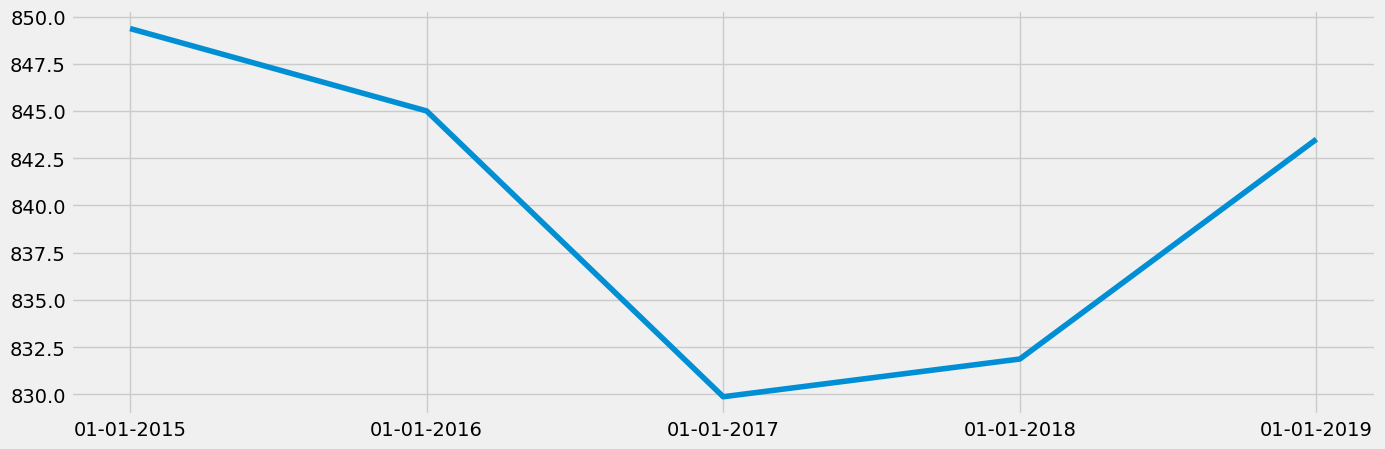

In [ ]:
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df2)

This makes no sense because it is aggregating all the sums of the happiness scores.
We can see that the general trendline for ALL of the countries through the years has been a sharp downturn in the year of 2017 (not sure why) and then an increase after that. It would be helpful if we had MORE information, rather than a yearly survey, if it was monthly, so we could measure the seasons, etc.

In [ ]:
df2.isnull().sum()

0

In [ ]:
dups= df2.duplicated()
dups.sum()

0

no nulls no dups.

##decomposition

In [ ]:
#decompose using additive model

decomposition = sm.tsa.seasonal_decompose(df2, model='additive', period= 2)

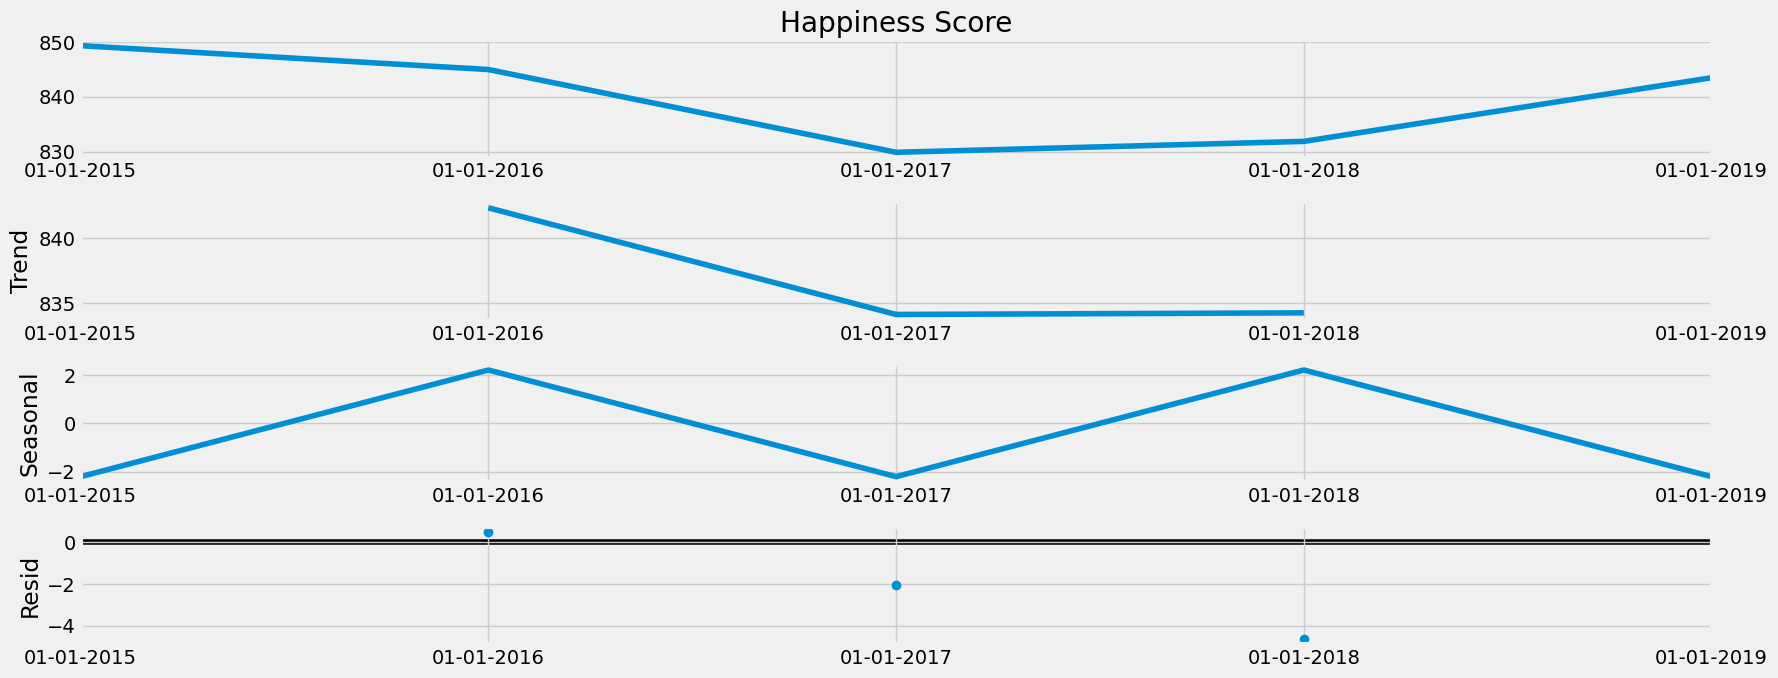

In [ ]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

# Plot the separate components

decomposition.plot()
plt.show()

This was the max amount of period i could use since there were few observations dates on the x axis (the 5 years). However, this tells us a bit more than the last graph and is helpful. So seasonally, it seems that every other years we hit a local maxium and local minimum in happiness scores. The trend line doesn't tell us much aside fro the local minimum we've hit over the 4 years we have done surveying, that being 2017.

##stationarity

In [ ]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['Happiness Score'])

KeyError: ignored

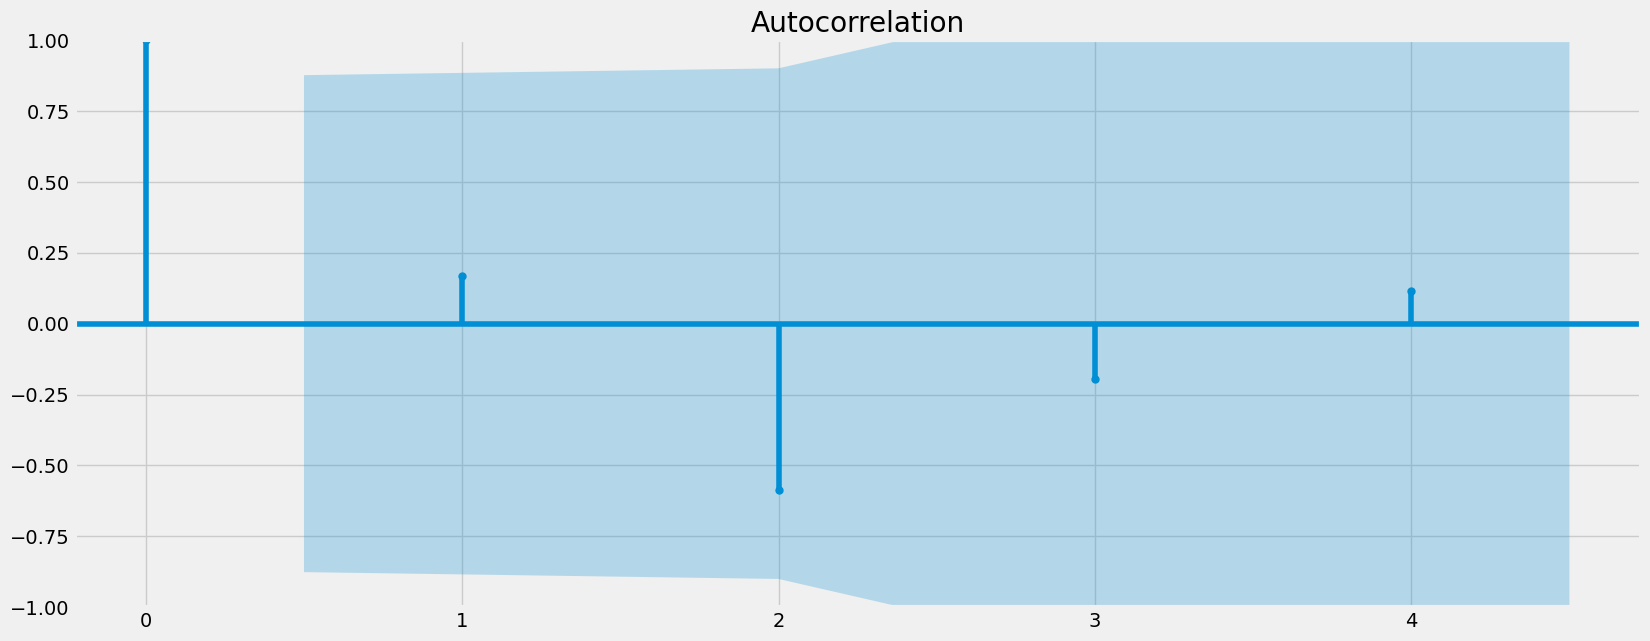

In [ ]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

very little lag above confidence interval.

ValueError: ignored

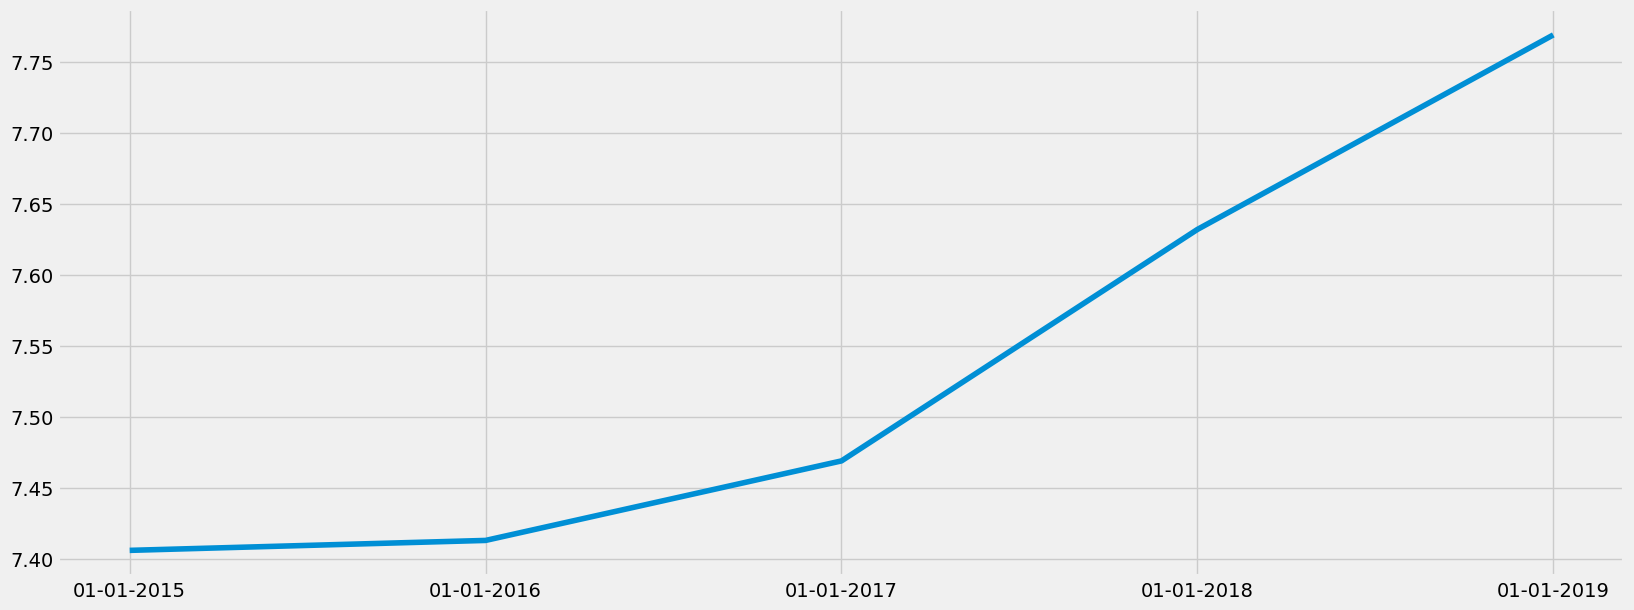

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

country = "Finland"
filtered_df = df[df['Country'] == country]

x = filtered_df['Year']
y = filtered_df['Happiness Score']

# Plot the time series
plt.plot(x, y, label=country)

# Perform time series decomposition
decomposition = seasonal_decompose(y, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.plot(x, trend, label='Trend', linestyle='dashed')
plt.plot(x, seasonal, label='Seasonal', linestyle='dotted')
plt.plot(x, residual, label='Residual', linestyle='dashdot')

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score over Time - Decomposed (FInland)')

plt.legend()
plt.tight_layout()
plt.show()


ValueError: ignored

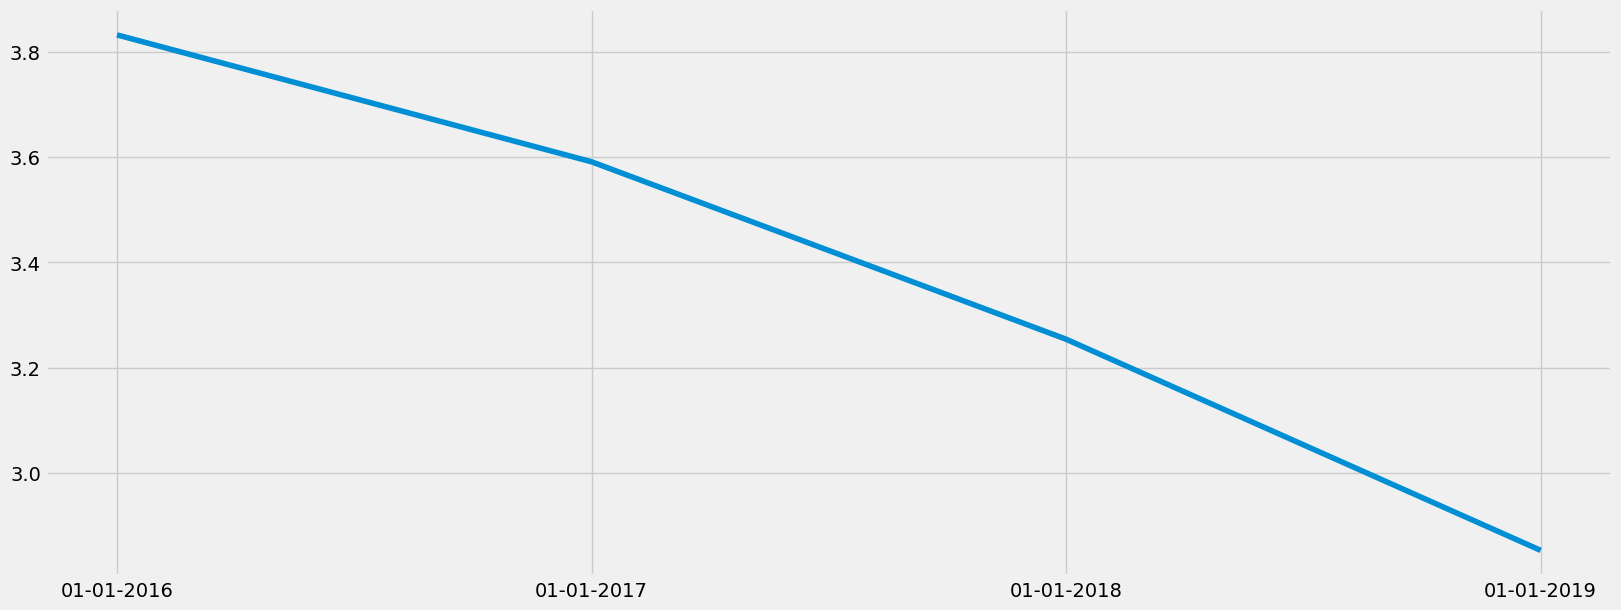

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

country = "South Sudan"
filtered_df = df[df['Country'] == country]

x = filtered_df['Year']
y = filtered_df['Happiness Score']

# Plot the time series
plt.plot(x, y, label=country)

# Perform time series decomposition
decomposition = seasonal_decompose(y, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.plot(x, trend, label='Trend', linestyle='dashed')
plt.plot(x, seasonal, label='Seasonal', linestyle='dotted')
plt.plot(x, residual, label='Residual', linestyle='dashdot')

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score over Time - Decomposed (South Sudan)')

plt.legend()
plt.tight_layout()
plt.show()
